In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('yellow_taxi_trips_aug_2024.csv',low_memory=False)

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-08-01 00:21:00.000000,2024-08-01 00:36:13.000000,1,7.40,1,N,138,80,1,28.90,7.75,0.5,7.65,0.00,1.0,45.80,0,1.75
1,2,2024-08-01 00:20:01.000000,2024-08-01 00:41:47.000000,1,9.91,1,N,138,239,1,40.80,6.00,0.5,11.55,6.94,1.0,71.04,2.5,1.75
2,1,2024-08-01 00:17:52.000000,2024-08-01 00:41:45.000000,0,13.40,1,N,138,88,1,52.00,10.25,0.5,15.00,0.00,1.0,78.75,2.5,1.75
3,1,2024-08-01 00:49:08.000000,2024-08-01 00:55:56.000000,0,3.90,1,N,209,137,3,17.00,3.50,0.5,0.00,0.00,1.0,22.00,2.5,0
4,1,2024-08-01 00:38:52.000000,2024-08-01 00:42:34.000000,1,0.40,1,N,148,144,2,5.10,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979178,2,2024-08-31 23:22:27.000000,2024-08-31 23:52:10.000000,\N,10.90,\N,\N,56,35,0,41.25,0.00,0.5,0.00,0.00,1.0,42.75,\N,\N
2979179,2,2024-08-31 23:46:00.000000,2024-09-01 00:10:00.000000,\N,6.42,\N,\N,148,236,0,26.70,0.00,0.5,0.00,0.00,1.0,30.70,\N,\N
2979180,2,2024-08-31 23:41:20.000000,2024-08-31 23:56:24.000000,\N,1.89,\N,\N,68,100,0,18.90,0.00,0.5,0.00,0.00,1.0,22.90,\N,\N
2979181,2,2024-08-31 23:20:50.000000,2024-08-31 23:35:33.000000,\N,6.02,\N,\N,231,141,0,29.13,0.00,0.5,0.00,0.00,1.0,33.13,\N,\N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979183 entries, 0 to 2979182
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        object 
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   object 
 18  Airport_fee            object 
dtypes: float64(8), int64(4), object(7)
memory usage: 431.9+ MB


In [5]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [6]:
df['pickup_time'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [7]:
daily_revenue = df.groupby(df['pickup_time'].dt.date)['fare_amount'].sum()

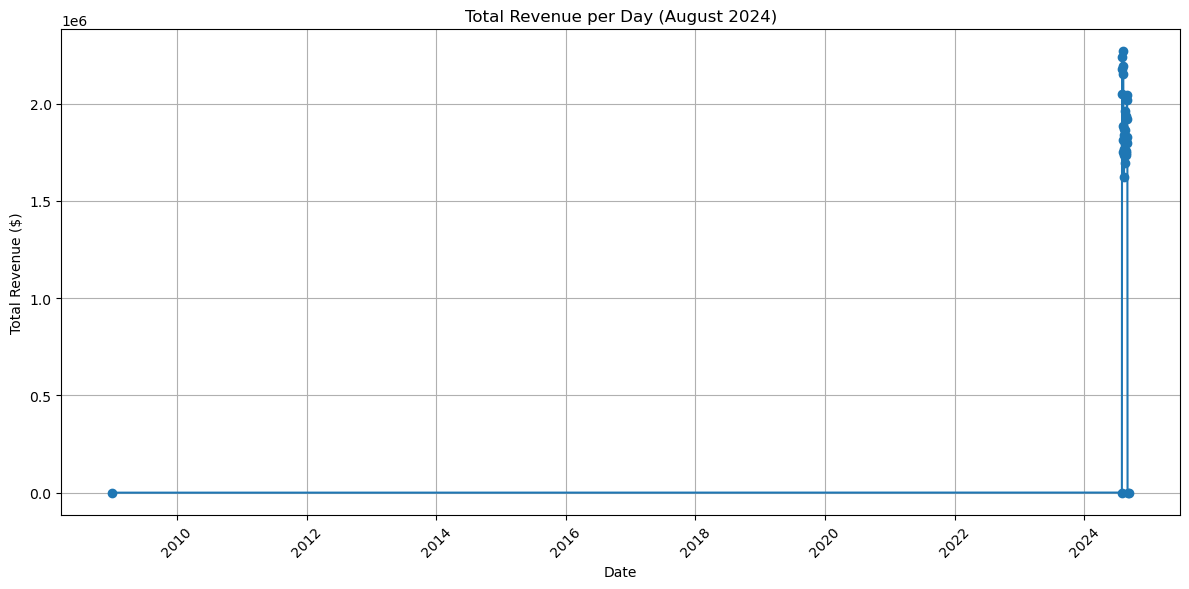

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o')
plt.title('Total Revenue per Day (August 2024)')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

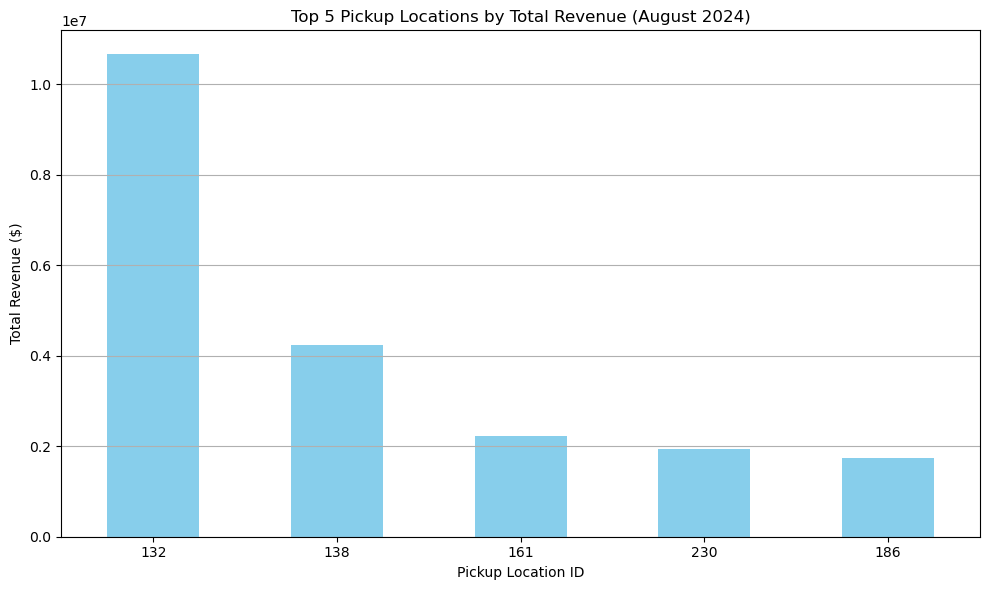

In [9]:
# Group by pickup_location and calculate total revenue
top_pickup_locations = df.groupby('PULocationID')['fare_amount'].sum().nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Pickup Locations by Total Revenue (August 2024)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


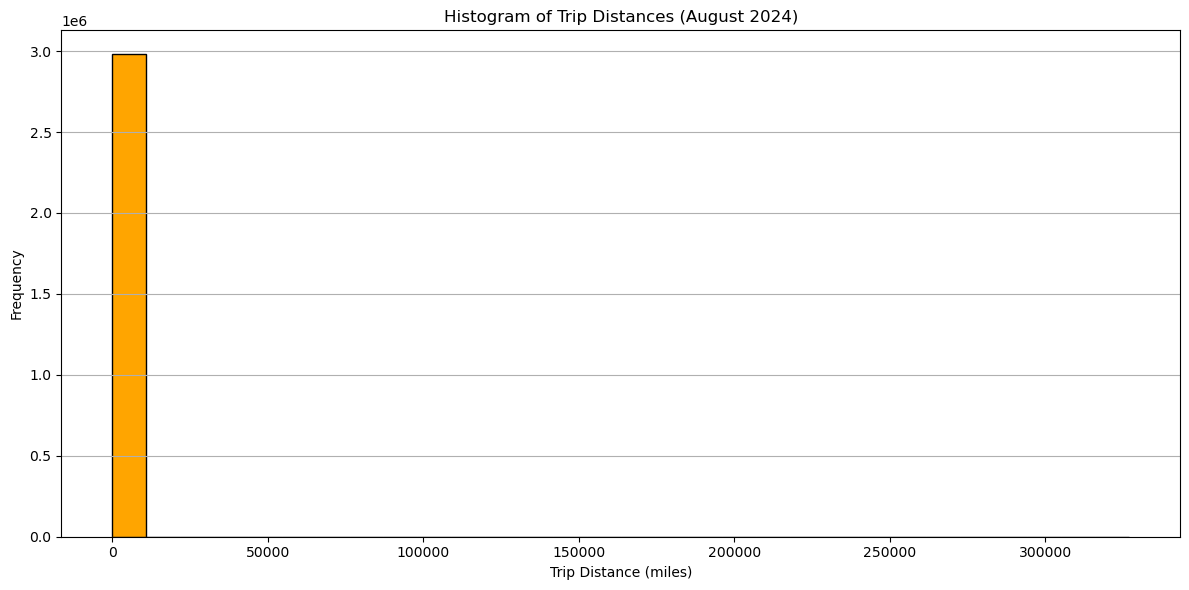

In [10]:
# Plotting a histogram of trip distances
plt.figure(figsize=(12, 6))
plt.hist(df['trip_distance'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Trip Distances (August 2024)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
